In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('placement_Outlier.csv')

In [21]:
df.shape

(1000, 3)

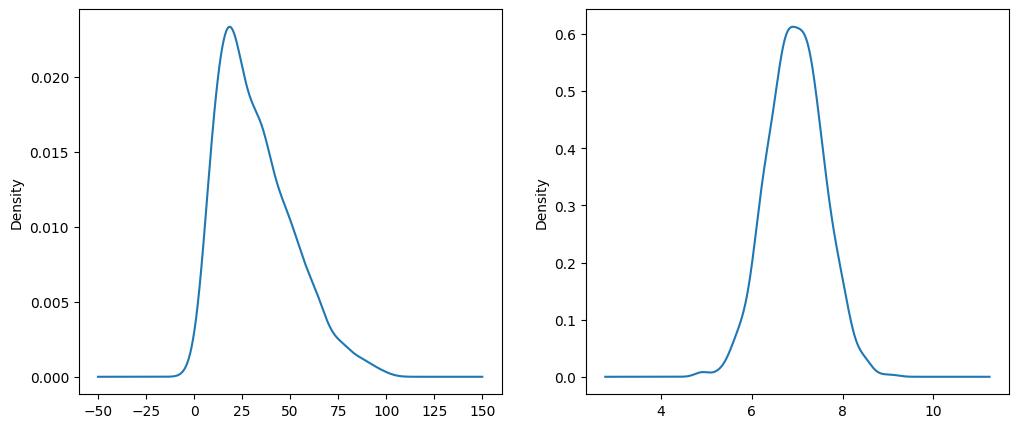

In [22]:
figure, (fig1, fig2) = plt.subplots(ncols = 2, figsize = (12, 5))

df['placement_exam_marks'].plot(kind='kde', ax = fig1)
df['cgpa'].plot(kind='kde', ax = fig2)

plt.show()

# IRQ Method for handling outlier
## this method is genraly used for skewed data 

In [23]:
iqr = df['placement_exam_marks'].quantile(.75)-df['placement_exam_marks'].quantile(.25)

In [24]:
upper_limite = df['placement_exam_marks'].quantile(0.75)+(1.5*iqr)
lower_limite = df['placement_exam_marks'].quantile(0.25)-(1.5*iqr)


In [25]:
upper_limite, lower_limite, iqr

(84.5, -23.5, 27.0)

# Triming 

In [26]:
triming_df = df[(df['placement_exam_marks']>lower_limite) & (df['placement_exam_marks']<upper_limite)]

In [27]:
triming_df.shape

(985, 3)

# Capping 

In [28]:
capping_df = df

In [29]:
capping_df['cgpa'] = np.where(
    capping_df['placement_exam_marks']>upper_limite,
    upper_limite,
    capping_df['placement_exam_marks']
)

In [30]:
capping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
